In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
y = data.Survived
X = data.drop(['Survived','PassengerId','Name','Ticket'],axis=1)

In [92]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [93]:
X.Fare = X.Fare.apply(lambda x: np.log(x + 1))

In [94]:
np.isnan(np.sum(X.Pclass)),np.isnan(np.sum(X.Age)),np.isnan(np.sum(X.SibSp)),np.isnan(np.sum(X.Parch)),np.isnan(np.sum(X.Fare))

(False, False, False, False, False)

In [83]:
from sklearn.preprocessing import MinMaxScaler

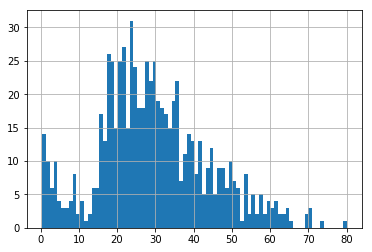

In [84]:
% matplotlib inline
X.Age.hist(bins=80)

In [97]:
X.Age=X.Age.fillna(0.0)

In [98]:
Scaler = MinMaxScaler()
Numerical = ['Pclass','Age','SibSp','Parch','Fare']
X[Numerical] = Scaler.fit_transform(X[Numerical])

In [99]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,male,0.2750,0.125,0.0,0.338125,NaN,S
1,0.0,female,0.4750,0.125,0.0,0.685892,C85,C
2,1.0,female,0.3250,0.000,0.0,0.350727,NaN,S
3,0.0,female,0.4375,0.125,0.0,0.639463,C123,S
4,1.0,male,0.4375,0.000,0.0,0.352955,NaN,S


In [100]:
X = pd.get_dummies(X)

In [101]:
len(X.columns)

157

In [103]:
SVC?

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [133]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [136]:

# TODO：初始化分类器
clf = AdaBoostClassifier(random_state=1)

# TODO：创建你希望调节的参数列表
parameters = {'n_estimators':np.arange(20,100,5),'learning_rate':[0.01,0.1,1]}

# TODO：创建一个fbeta_score打分对象
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    score = accuracy_score(y_true,y_predict)

    return score
scorer = make_scorer(performance_metric)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj = grid_obj.fit(X,y)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
#predictions = (clf.fit(X_train, y_train)).predict(X_val)
#best_predictions = best_clf.predict(X_val)

best_n_estimators = best_clf.get_params()['n_estimators']
best_learning_rate = best_clf.get_params()['learning_rate']

In [150]:
rmc = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1,n_estimators=77)
svc = SVC(random_state=1,)
gnb = GaussianNB()

vc = VotingClassifier(estimators=[('rmc',rmc),('ada',ada)],voting = 'hard')

for clf, label in zip([rmc,ada,svc,gnb,vc],['Random Forest','AdaBoost','Support Vector Machine','Gaussian Naive Bayes','Ensembled']):
    scores = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
    print('Accuracy: %0.4f(+/-%0.2f)[%s]'%(scores.mean(),scores.std(),label))

Accuracy: 0.8002(+/-0.02)[Random Forest]
Accuracy: 0.8082(+/-0.02)[AdaBoost]
Accuracy: 0.7867(+/-0.02)[Support Vector Machine]
Accuracy: 0.6622(+/-0.01)[Gaussian Naive Bayes]
Accuracy: 0.8148(+/-0.01)[Ensembled]
